# Introduction to Deep Neural Network

In this notebook, we will:
- Get started with Keras, Pytorch libraries for building neural networks.
  - Keras is an easy-implementing TensorFlow-based library.
  - Pytorch is more friendly with researchers.
- Design a simple deep neural network for classifying characters in the MNIST dataset.

# Tensorflow

## Import libraries

In [ ]:
#import libraries
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#keras version checking
keras.__version__

'2.15.0'

## Pre-processing

Rescaling the images' pixel value in $[0,1]$ to keep the weights being not too high.

The validation dataset is used to tune the hyper-parameter of the model.

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
There are 60000 images for training and validating, 10000 images for testingt
Each image only has 1 channel, and size 28x28

First image of the training set
Label of this image:  5


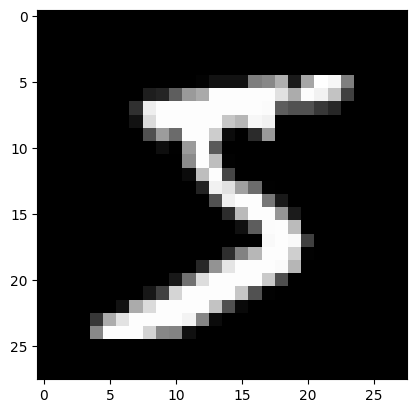

In [ ]:
# Download MNIST dataset from keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Rescale images' pixel in [0, 1]
X_train, X_test = X_train/255.0, X_test/255.0

# Checking dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("There are 60000 images for training and validating, 10000 images for testingt")
print("Each image only has 1 channel, and size 28x28")
print()

## Try to print an image
print("First image of the training set")
print("Label of this image: ", y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

# Split a part of training dataset into validating dataset
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [ ]:
## Create the inpurt layer
inputs = keras.layers.Input(shape=(28,28))

print("Input size: {}, the None value demonstrates for the unknown number of images in one batch.".format(inputs.shape))

## Reshape input
## Input do input vào lớp convolutional layer cần có 4 chiều, chiều cuối là số kênh,
## MNIST image is grayscale, it only has 1 channel
inputs_reshape = keras.layers.Reshape((28,28,1))(inputs)
print("Reshaped size: {}".format(inputs_reshape.shape))

## Create a convolutional network
### fileters: number of filters
### kernel_size: filter size
### strides: strides of filter for calculating convolutional
### padding: add zeros at borders of images
### activation: activation function of the convolutional layer
conv = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='same',
                                 activation=tf.nn.relu)(inputs_reshape)
print("Conv size: {}, the last dimension is the number of filters".format(conv.shape))

## Maxpooling
### pool_size: pooling size
### strides: pooling strides
maxpool = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv)
print("Size after maxpooling: {}".format(maxpool.shape))

## Flatten the convolutional layer before assign them to the dense layer since this layer requires input as a vector
flatten = keras.layers.Flatten()(maxpool)
print("Flatten size: {}".format(flatten.shape))

## The fully connected layer with softmax being the activation function, units are Node's numbers
softmax = keras.layers.Dense(units=10, activation='softmax')(flatten)


## Create the model
model = keras.models.Model(inputs=inputs, outputs=softmax)

## Compile model,
    ### optimizer is the optimal algorithm, we will use sgd
    ### loss function is the objective
    ### metrics: evaluation metrics

opt = keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer = opt,
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])


## Print the model architecture
print("Model's architecture:")
model.summary()

Input size: (None, 28, 28), the None value demonstrates for the unknown number of images in one batch.
Reshaped size: (None, 28, 28, 1)
Conv size: (None, 28, 28, 20), the last dimension is the number of filters
Size after maxpooling: (None, 14, 14, 20)
Flatten size: (None, 3920)
Model's architecture:
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 20)        520       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 20)        0         
 g2D)                                                            
                     

In [ ]:
# Use the fit function to train model
## Inputs as two numpy array, X_train is images, y_train is labels
## batch_size: Batch size
## epochs: Running epochs
## validation data: We will evaluate the model based on this data
history=model.fit(X_train,y_train,
                  epochs=1,
                  batch_size=32,
                  validation_data=(X_valid,y_valid))

## Save model as a file
model.save_weights("first_model.h5")


## Load model
model.load_weights("first_model.h5")

## Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss on test set:", test_loss," Accuracy on test set:", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3026 - accuracy: 0.9126
Loss on test set: 0.30257442593574524  Accuracy on test set: 0.9125999808311462


# Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Hyperparameters
learning_rate = 0.01
batch_size = 32
num_epochs = 1

# Download MNIST dataset
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
transform = transforms.Compose([transforms.ToTensor()])#, transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 138344063.18it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 99454592.63it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 136467330.92it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14238063.35it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Define the convolutional neural network class
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(20 * 14 * 14, 10)  # Output size after max pooling: (28-2)/2 = 14

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(out.size(0), -1)  # Flatten the output for fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# Initialize the model
model = ConvNet()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
# criterion = nn.KLDivLoss(reduction="batchmean")
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        # labels = torch.nn.functional.one_hot(labels, num_classes=10).float()  # Convert labels to one-hot encoding
        # loss = criterion(torch.log_softmax(outputs, dim=1), labels)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total}%')

Epoch [1/1], Step [100/1875], Loss: 1.1632
Epoch [1/1], Step [200/1875], Loss: 0.8257
Epoch [1/1], Step [300/1875], Loss: 0.4861
Epoch [1/1], Step [400/1875], Loss: 0.6125
Epoch [1/1], Step [500/1875], Loss: 0.2757
Epoch [1/1], Step [600/1875], Loss: 0.3131
Epoch [1/1], Step [700/1875], Loss: 0.2887
Epoch [1/1], Step [800/1875], Loss: 0.3534
Epoch [1/1], Step [900/1875], Loss: 0.3657
Epoch [1/1], Step [1000/1875], Loss: 0.4177
Epoch [1/1], Step [1100/1875], Loss: 0.6945
Epoch [1/1], Step [1200/1875], Loss: 0.2164
Epoch [1/1], Step [1300/1875], Loss: 0.5026
Epoch [1/1], Step [1400/1875], Loss: 0.4525
Epoch [1/1], Step [1500/1875], Loss: 0.2928
Epoch [1/1], Step [1600/1875], Loss: 0.3698
Epoch [1/1], Step [1700/1875], Loss: 0.2416
Epoch [1/1], Step [1800/1875], Loss: 0.1180
Accuracy of the model on the 10000 test images: 91.8%


In [ ]:
# Initialize the model
model = ConvNet()

learning_rate = 0.01
batch_size = 32
num_epochs = 1

# Loss and optimizer
# criterion = nn.CrossEntropyLoss()
criterion = nn.KLDivLoss(reduction="batchmean")
# criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        labels = torch.nn.functional.one_hot(labels, num_classes=10).float()  # Convert labels to one-hot encoding
        labels
        loss = criterion(torch.log_softmax(outputs, dim=1), labels)

        #log-softmax output values are in the range of [-inf, 0]
        #KL loss require input in range of [-inf, 0]

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total}%')

Epoch [1/2], Step [100/1875], Loss: -0.1105
Epoch [1/2], Step [200/1875], Loss: -0.1427
Epoch [1/2], Step [300/1875], Loss: -0.2293
Epoch [1/2], Step [400/1875], Loss: -0.3111
Epoch [1/2], Step [500/1875], Loss: -0.3930
Epoch [1/2], Step [600/1875], Loss: -0.4527
Epoch [1/2], Step [700/1875], Loss: -0.5901
Epoch [1/2], Step [800/1875], Loss: -0.6509
Epoch [1/2], Step [900/1875], Loss: -0.5812
Epoch [1/2], Step [1000/1875], Loss: -0.7594
Epoch [1/2], Step [1100/1875], Loss: -0.7658
Epoch [1/2], Step [1200/1875], Loss: -0.8054
Epoch [1/2], Step [1300/1875], Loss: -0.7902
Epoch [1/2], Step [1400/1875], Loss: -0.7374
Epoch [1/2], Step [1500/1875], Loss: -0.8344
Epoch [1/2], Step [1600/1875], Loss: -0.7461
Epoch [1/2], Step [1700/1875], Loss: -0.7976
Epoch [1/2], Step [1800/1875], Loss: -0.8781
Epoch [2/2], Step [100/1875], Loss: -0.7325
Epoch [2/2], Step [200/1875], Loss: -0.9129
Epoch [2/2], Step [300/1875], Loss: -0.7771
Epoch [2/2], Step [400/1875], Loss: -0.8560
Epoch [2/2], Step [500/

# Exercise 01

1. Create and train a Neural Network with the following architecture on MNIST dataset (All strides of the Convolutional layers are [1, 1])

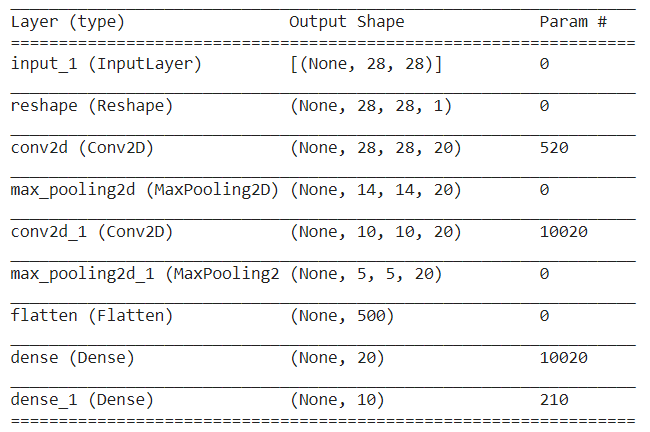

# Exercise 02: Get started with Federated Learning

## Import libraries

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

from tqdm.auto import tqdm
from copy import deepcopy
from IPython.display import clear_output

import sys

## Create dataset

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split dataset into train and test sets
train_size = int(0.8 * len(mnist_data))
test_size = len(mnist_data) - train_size
train_dataset, test_dataset = random_split(mnist_data, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define a function to get a subset with 1 to 5 samples per class using Dirichlet distribution
def get_subset(dataset, min_samples=1, max_samples=5, alpha=0.1):
    subset_indices = []
    class_counts = {i: 0 for i in range(10)}  # Initialize counts for each class

    # Iterate through the dataset
    for idx, (data, target) in enumerate(dataset):
        # Check if the current class has less than the maximum allowed samples
        if class_counts[target] < max_samples:
            # Calculate the probabilities using Dirichlet distribution
            probs = np.random.dirichlet([alpha] * (max_samples - class_counts[target] + 1))
            # Sample index based on the probabilities
            sample_index = np.random.choice(range(max_samples - class_counts[target] + 1), p=probs)
            if sample_index == 0:
                subset_indices.append(idx)  # Add index to subset
                class_counts[target] += 1    # Increment count for the current class
        # Check if we have reached the maximum samples for all classes
        if all(count >= max_samples for count in class_counts.values()):
            break

    return torch.utils.data.Subset(dataset, subset_indices)

# Define a network

## Federated Learning Framework

In [ ]:
def update_progress(progress, title, accuracy):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))
    clear_output(wait = True)
    text = title + " [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100) + " - accuracy: " + str(accuracy)
    print(text, file=sys.stderr, end='', flush=True)

In [ ]:
#Define the traditional deep learning process

def train(model, device, subset_train_dataset, n_epochs, learning_rate):
    """
    TRAINING PROCESS

    INPUT:
    model: local model of the client
    device: which device is using, ["cuda" or "cpu"]
    subset_train_dataset: local dataset of the client
    n_epochs: local training epoch
    learning_rate: local learning rate

    OUTPUT:
    model: local model after update (can be skipped)
    total_sample: total sample size of client (collect for aggregating)
    """

    #Code here
    return model, total_sample

In [ ]:
def eval(model, test_loader):
    """
    EVALUATION PROCESS

    INPUT:
    model: local model of the client
    test_loader: test dataset loader for evaluating accuracy

    OUTPUT:
    acc: Accuracy of the model on test dataset
    """

    #Code here
    return acc

In [ ]:
#FedAVG aggregating mechanism

def FedAVG(weights, sample_size_list):
    """
    EVALUATION PROCESS

    INPUT:
    weights: local models' weights list
    sample_size_list: local datasets' size list

    OUTPUT:
    w_avg: global model weight
    """
    
    total_sample = sum(sample_size_list)

    #initiate the global model weight using 1st local weight
    w_avg = deepcopy(weights[0])

    for k in w_avg.keys():
        w_avg[k] = torch.multiply(w_avg[k], sample_size_list[0] / total_sample)

    #for other local models, summing the weights with a scaling of local_size/total_size
    
    #Code here

    return w_avg

In [ ]:
# Initialize the model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
global_model = ConvNet()

In [ ]:
accuracies = []

ROUND = 10
CLIENT_PER_ROUND = 5
CLIENT_EPOCHS = 1
LEARNING_RATE = 0.01

for r in range(ROUND):
    weights = []
    sample_size_list = []

    for _ in range(CLIENT_PER_ROUND):
        
        # send global model weights to clients
        model = deepcopy(global_model)

        # each client has a private subset
        subset_train_dataset = get_subset(train_dataset, min_samples=1, max_samples=3, alpha=0.1)

        # train the client
        model, client_sample_size = train(model, device, subset_train_dataset, CLIENT_EPOCHS, LEARNING_RATE)

        # collect clients
        weights.append(model.state_dict())
        sample_size_list.append(client_sample_size)

    # aggregate global model
    global_model.load_state_dict(FedAVG(weights, sample_size_list))

    accuracy = eval(global_model, test_loader)
    accuracies.append(accuracy)
    update_progress(r/ROUND, "Round " + str(r) + ": ", accuracy)

accuracy = eval(global_model, test_loader)
update_progress(1, "Round " + str(ROUND) + ": ", accuracy)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(ROUND)), accuracies)
plt.xlabel("Communication round")
plt.ylabel("Main Task Accuracy")
plt.title("Federated Learning on MNIST dataset")
plt.show()